In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('C:/Users/Administrator/Downloads/weather_data.csv')

In [3]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No


In [4]:
data1=data.copy()

In [5]:
y=data['Play']
x=data.drop(['Play'],axis=1)

In [6]:
print(y.shape)
print(x.shape)

(14,)
(14, 4)


In [7]:
x_dummies=pd.get_dummies(x)

In [21]:
x_dummies.columns.value_counts().count()

10

In [22]:
x_dummies

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,1,0
5,0,0,1,0,0,1,1,0,0,1
6,0,0,1,1,0,0,0,1,0,1
7,0,1,0,0,0,1,0,1,0,1
8,0,0,1,0,0,1,0,1,1,0
9,1,0,0,0,0,1,1,0,1,0


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_dummies,y,test_size=.3,random_state=0)



In [10]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
y_pred=clf.predict(x_test)

In [12]:
print(y_pred)

['No' 'No' 'Yes' 'Yes' 'Yes']


In [23]:
cols=list(x_dummies.columns.values)
cols

['Outlook_Overcast',
 'Outlook_Rain',
 'Outlook_Sunny',
 'Temperature_Cool',
 'Temperature_Hot',
 'Temperature_Mild',
 'Humidity_High',
 'Humidity_Normal',
 'Wind_Strong',
 'Wind_Weak']

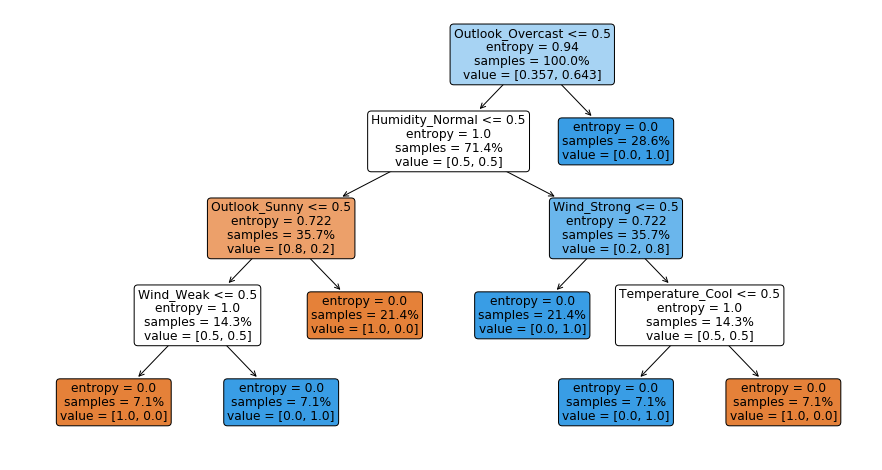

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

tree.plot_tree(clf.fit(x_dummies,y),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True)
plt.show()

In [15]:
import sklearn

sklearn.__version__  

'0.21.3'